# <center><B>MSCA-31006 <span style="color:maroon">Time Series Analysis and Forecasting</span></B></center>
## <center><B><U><i>Final Project</i></U></B></center>&nbsp; <center><i>Exploratory Data Analysis - Production and Capacity</i></center>

In [2]:
library(stats)
library(tseries)
library(TSA)
library(fpp)
library(fpp2)
library(dlm)
library(vars)
library(ggplot2)
library(forecast)
library(urca)

<br>

<h4>Useful Conversions:</h4>

- $1\,\text{MWh}\: \xrightarrow{\times} \: 3.412\times10^{-6}\: \xrightarrow{=}\: 1\,\text{Trillion Btu}$

- $1\,\text{Trillion Btu}\: \xrightarrow{\div} \: 3.412\times10^{-6}\: \xrightarrow{=}\:1\,\text{MWh}$

- $1\,\text{million KWh}\: \xrightarrow{\times} \: 3.412\times10^{-3}\: \xrightarrow{=}\: 1\,\text{Trillion Btu}$

- $1\,\text{Trillion Btu}\: \xrightarrow{\div} \: 3.412\times10^{-3}\: \xrightarrow{=}\: 1\,\text{million KWh}$

- $1\,\text{MWh}\: \xrightarrow{\div} \: (24\times 30)\: \xrightarrow{=}\:1\,\text{MW}$ for <i>monthly</i> data

In [3]:
# Use these variables for easy conversion
btu2MW <- 3.412e-6
btu2kW <- 3.412e-3
MWh2MW <- (24*30)

<br>

<h4><b>Load the <i>all</i> the data</b></h4>
Even if not all of it is used for modeling, some of it may be important for reference and analysis.

In [4]:
dta <- load("Monthly_Data.RData")
ts <- load("Time_Series.RData")
ILdta <- load("IL_Data.RData")
cap <- load("capacity.RData")

In [5]:
print(c(dta, ts, ILdta, cap))

 [1] "monthly_dta"    "monthly_meta"   "monthly_dta_ts" "yearly_dta_ts" 
 [5] "IL_data"        "IL_solar"       "IL_wind"        "IL_wind_ts"    
 [9] "IL_solar_ts"    "capacity"       "wind_cap"       "wind_cap_ts"   
[13] "solar_cap"      "solar_cap_ts"   "ng_cap"         "ng_cap_ts"     
[17] "coal_cap"       "coal_cap_ts"   


<br>

---

<br>

<h3><b>Exploratory Data Analysis</b></h3>

<h4><u>Electricity Generation from Different Sources</u></h4>
To begin, it will probably be informative to look at electric power generation from different energy sources. The U.S. generates electricity from a large variety of different sources but we limit ourselves here to a few sources of particular interest. First is coal, which is the oldest fossil fuel used in the United States as a source of energy and for a long time was the main source of energy. Next is natural gas, which started to become more popular in the early 1960's then boomed in the early 2000's to overtake coal as the main fossil fuel for energy production. Finally, wind and solar are grouped together to represent modern renewables.

<br>

Electrical energy output from different sources:

In [6]:
rbind(monthly_meta$Elec_by_Source, head(monthly_dta$Elec_by_Source))

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Month,"Electricity Net Generation From Coal, Electric Power Sector","Electricity Net Generation From Petroleum, Electric Power Sector","Electricity Net Generation From Natural Gas, Electric Power Sector","Electricity Net Generation From Other Gases, Electric Power Sector","Electricity Net Generation From Nuclear Electric Power, Electric Power Sector","Electricity Net Generation From Hydroelectric Pumped Storage, Electric Power Sector","Electricity Net Generation From Conventional Hydroelectric Power, Electric Power Sector","Electricity Net Generation From Wood, Electric Power Sector","Electricity Net Generation From Waste, Electric Power Sector","Electricity Net Generation From Geothermal, Electric Power Sector","Electricity Net Generation From Solar, Electric Power Sector","Electricity Net Generation From Wind, Electric Power Sector","Electricity Net Generation Total (including from sources not shown), Electric Power Sector"
NA,(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu)
01/01/1973,256.548788388,106.398508028,72.283107404,NA,21.312208412,NA,88.522169968,0.017595684,0.051698624,0.48958788,NA,NA,545.6236678
02/01/1973,231.326591752,89.008680224,69.1016153,NA,20.226571428,NA,78.582341804,0.051650856,0.047338088,0.447555452,NA,NA,488.792341492
03/01/1973,229.926532144,82.00143194,82.035562176,NA,22.686411884,NA,87.219737916,0.06121128,0.057707156,0.463820456,NA,NA,504.452418364
04/01/1973,218.146387188,68.906786688,85.403267592,NA,20.050249504,NA,82.135697552,0.021574076,0.057222652,0.54150146,NA,NA,475.262686712
05/01/1973,221.531541572,74.1836187,101.527417408,NA,19.436993684,NA,84.594473464,0.015657668,0.068953108,0.50485658,NA,NA,501.863515596
06/01/1973,237.448037068,88.710334944,118.148538672,NA,23.147526624,NA,81.042083312,0.012648284,0.057792456,0.578859448,NA,NA,549.145820808


<br>

Input from different sources (the amount of energy consumed to generate electricity). The difference between these numbers and those above is the amount of energy lost:

In [7]:
rbind(monthly_meta$Consump_Elec, head(monthly_dta$Consump_Elec))

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Month,Coal Consumed by the Electric Power Sector,Natural Gas Consumed by the Electric Power Sector (Excluding Supplemental Gaseous Fuels),Petroleum Consumed by the Electric Power Sector,Total Fossil Fuels Consumed by the Electric Power Sector,Nuclear Electric Power Consumed by the Electric Power Sector,Conventional Hydroelectric Power Consumed by the Electric Power Sector,Geothermal Energy Consumed by the Electric Power Sector,Solar Energy Consumed by the Electric Power Sector,Wind Energy Consumed by the Electric Power Sector,Biomass Energy Consumed by the Electric Power Sector,Total Renewable Energy Consumed by the Electric Power Sector,Electric Power Sector Electricity Net Imports,Total Primary Energy Consumed by the Electric Power Sector
NA,(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu)
01/01/1973,768.746,229.478,349.393,1347.618,68.103,269.536,1.491,NA,NA,0.211,271.238,4.137,1691.096
02/01/1973,687.33,220.677,294.145,1202.152,64.634,239.271,1.363,NA,NA,0.301,240.935,3.737,1511.458
03/01/1973,683.507,263.75,267.926,1215.183,72.494,265.57,1.412,NA,NA,0.362,267.345,4.137,1559.159
04/01/1973,648.927,275.69,225.482,1150.099,64.07,250.09,1.649,NA,NA,0.24,251.979,4.004,1470.152
05/01/1973,659.121,326.899,239.991,1226.011,62.111,257.577,1.537,NA,NA,0.258,259.372,4.137,1551.631
06/01/1973,709.685,381.951,291.407,1383.043,73.968,246.76,1.763,NA,NA,0.214,248.737,4.004,1709.752


<br>

In [8]:
options(repr.plot.width = 10, repr.plot.height = 5)

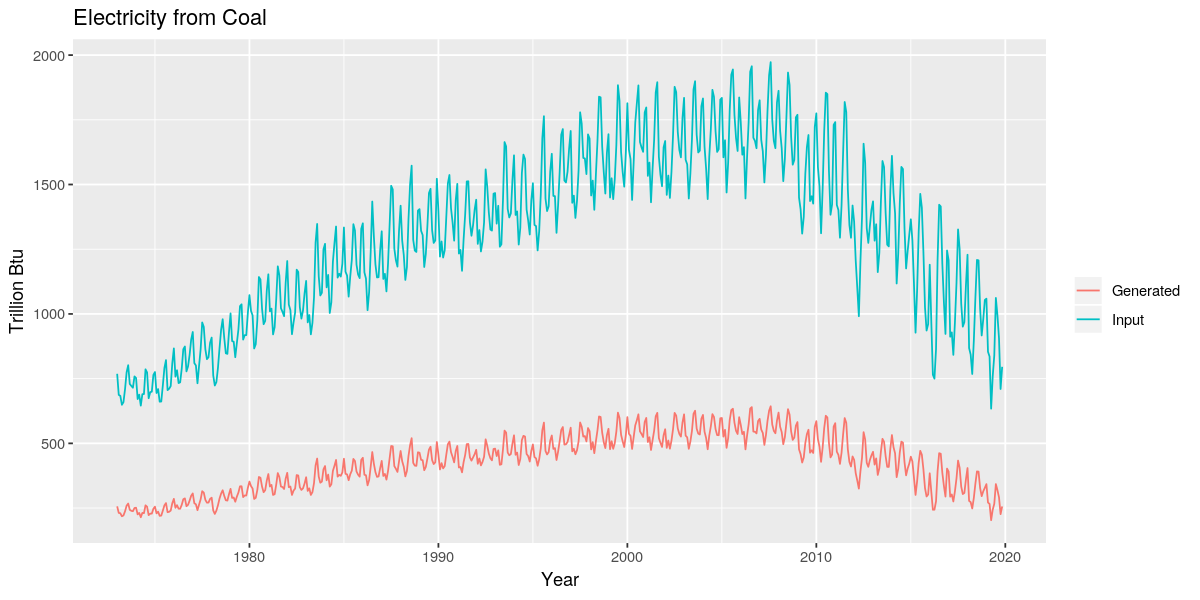

In [9]:
coal_prod <- monthly_dta_ts$Elec_by_Source[,"V2"]
coal_cnsm <- monthly_dta_ts$Consump_Elec[,"V2"]

autoplot(cbind(Generated = coal_prod, Input = coal_cnsm)) + 
         xlab("Year") + ylab("Trillion Btu") + ggtitle("Electricity from Coal") + 
         guides(color = guide_legend(title = ""))

From the plot above, it can be seen that electrical generation from coal tapered off between 2000-2010 and then began to decline sharply at the end of the decade. The output is clearly seasonal.

<br>

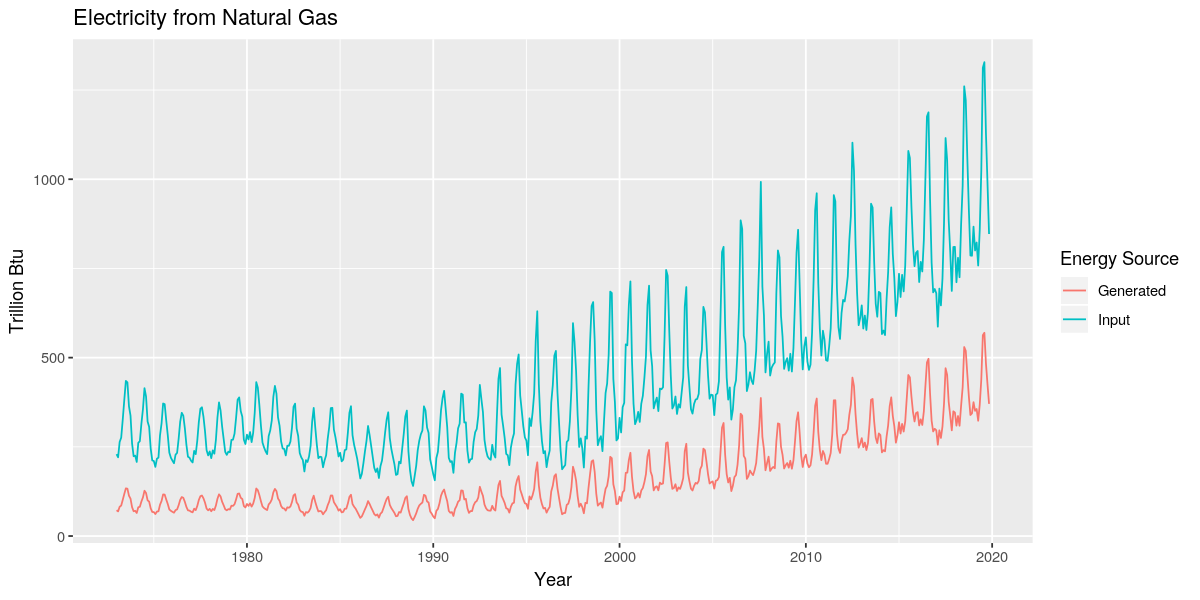

In [10]:
ng_prod <- monthly_dta_ts$Elec_by_Source[,"V4"]
ng_cnsm <- monthly_dta_ts$Consump_Elec[,"V3"]

autoplot(cbind(Generated = ng_prod, Input = ng_cnsm)) + 
         xlab("Year") + ylab("Trillion Btu") + ggtitle("Electricity from Natural Gas") + 
         guides(color = guide_legend(title = "Energy Source"))

Output from natural gas has seen a steady increase since late 1990's as it took over from coal as the main fossil fuel source for electricity generation. Again, it is easy to see the seasonality in the data.

<br>

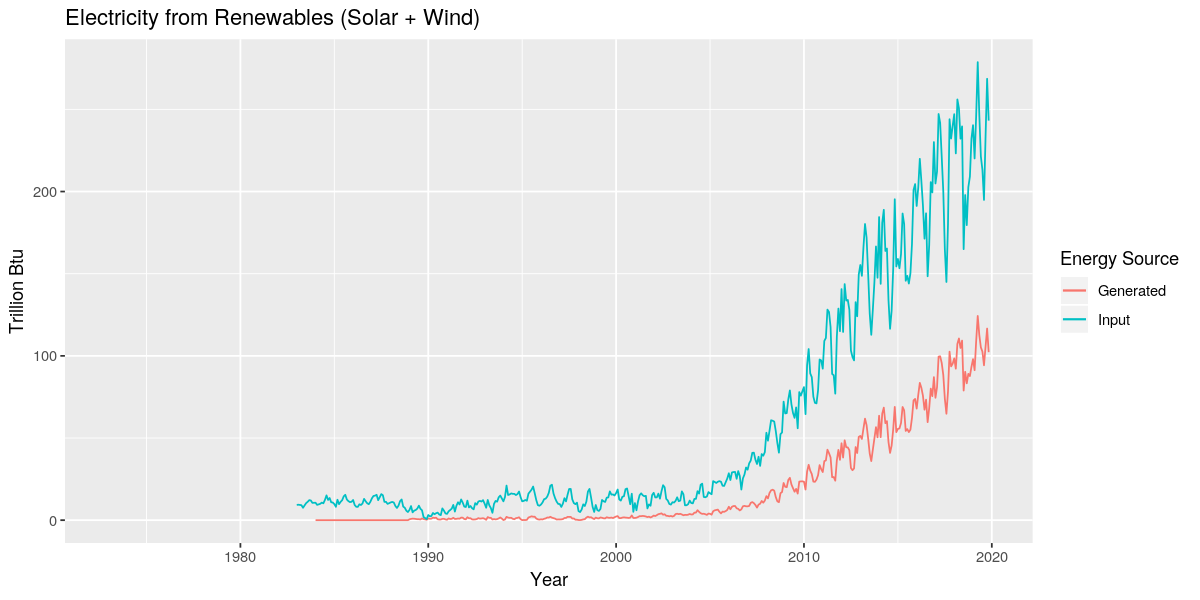

In [11]:
rnw_prod <- monthly_dta_ts$Elec_by_Source[,"V13"] + monthly_dta_ts$Elec_by_Source[,"V12"]
rnw_cnsm <- monthly_dta_ts$Consump_Elec[,"V10"] + monthly_dta_ts$Consump_Elec[,"V13"]

autoplot(rnw_prod, series = "Generated") + 
         autolayer(rnw_cnsm, series = "Input", na.rm = T) + 
         xlab("Year") + ylab("Trillion Btu") + ggtitle("Electricity from Renewables (Solar + Wind)") + 
         guides(color = guide_legend(title = "Energy Source"))

Wind and solar have very recently seen rapid growth as sources of electrical energy. There seems to be a seasonal pattern to the data but it is much harder to distinguish for renewables than the other two sources.

<br>

This next plot examines the <i>efficiency</i> of electrical generation from different sources over time. Efficiency is important because the efficiency of a source is assumed to be an important driver of its use for electricity generation. It is defined below as the output electrical energy divided by the input energy:

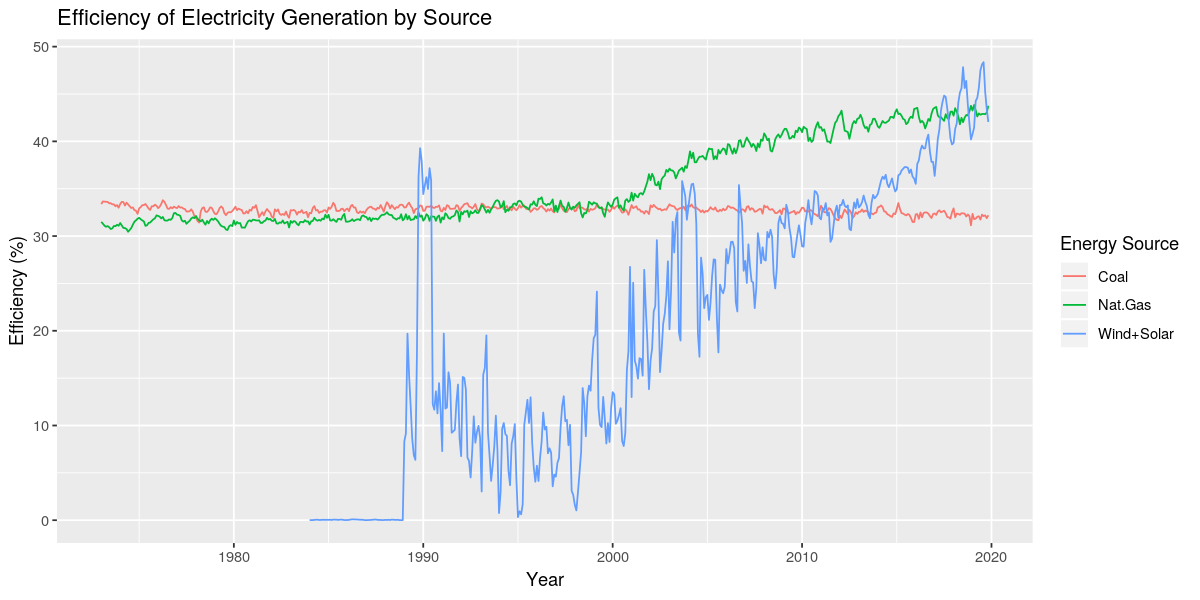

In [12]:
eff_coal <- (coal_prod/coal_cnsm)*100
eff_ng <- (ng_prod/ng_cnsm)*100
eff_rnw <- (rnw_prod/rnw_cnsm)*100

autoplot(cbind("Coal" = eff_coal, "Nat.Gas" = eff_ng, "Wind+Solar" = eff_rnw)) + 
         xlab("Year") + ylab("Efficiency (%)") + ggtitle("Efficiency of Electricity Generation by Source") + 
         guides(color = guide_legend(title = "Energy Source"))

Efficiency of electricity generation has improved overall for all except coal. In the early years, Wind and solar were notorious for their poor efficiencies but it is good to see that they have improved significantly and have caught up with recent improvements in natural gas efficiency.

<br>

This next plot looks at consumption of these sources as a proportion of total electricity generation over the years:

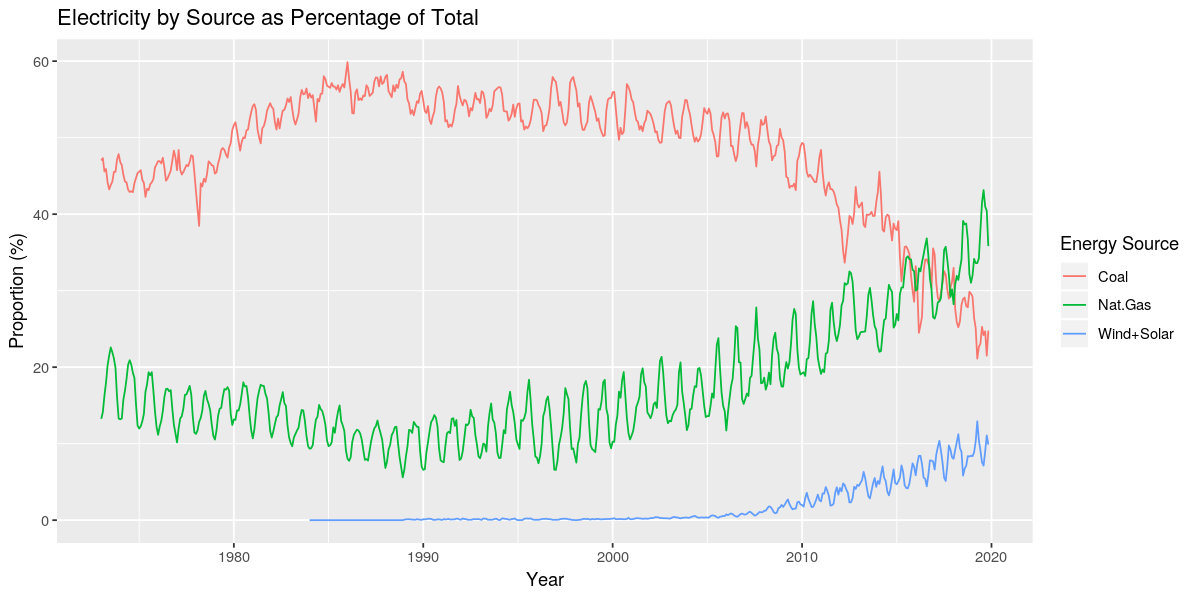

In [13]:
tot <- monthly_dta_ts$Elec_by_Source[,"V14"]
coal_p <- (coal_prod/tot)*100
ng_p <- (ng_prod/tot)*100
rnw_p <- (rnw_prod/tot)*100

autoplot(cbind("Coal" = coal_p, "Nat.Gas" = ng_p, "Wind+Solar" = rnw_p)) + 
         xlab("Year") + ylab("Proportion (%)") + ggtitle("Electricity by Source as Percentage of Total") + 
         guides(color = guide_legend(title = "Energy Source"))

It is clear from this plot that wind and solar are becoming a significant source of electricity despite only recently being added to America's energy portfolio. However, the plot also shows that the growth is somewhat overshadowed by the growth in natural gas use.

<br><br>

<h4><u>Examining Installed Capacity</u></h4>
A quick review of the literature shows that installed capacity affects expected output. Forecasting future capacity should be informative for production forecasts. This data is assembled, filtered, and aggregated from EIA's December 2019 <i>Monthly Electric Generator Inventory</i> report.

In [14]:
head(capacity, 10)

,Name,Sector,State,Capacity.MW,Technology,Source,Operating.Month,Operating.Year,Status
,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<int>,<int>,<fct>
1,Bankhead Dam,Electric Utility,AL,53.9,Conventional Hydroelectric,WAT,7,1963,(OP) Operating
2,Barry,Electric Utility,AL,153.1,Natural Gas Steam Turbine,NG,2,1954,(OP) Operating
3,Barry,Electric Utility,AL,153.1,Natural Gas Steam Turbine,NG,7,1954,(OP) Operating
4,Barry,Electric Utility,AL,403.7,Conventional Steam Coal,BIT,12,1969,(OP) Operating
5,Barry,Electric Utility,AL,788.8,Conventional Steam Coal,BIT,10,1971,(OP) Operating
6,Barry,Electric Utility,AL,170.1,Natural Gas Fired Combined Cycle,NG,5,2000,(OP) Operating
7,Barry,Electric Utility,AL,170.1,Natural Gas Fired Combined Cycle,NG,5,2000,(OP) Operating
8,Barry,Electric Utility,AL,195.2,Natural Gas Fired Combined Cycle,NG,5,2000,(OP) Operating
9,Barry,Electric Utility,AL,170.1,Natural Gas Fired Combined Cycle,NG,5,2000,(OP) Operating


Below is a sample of the time-series data distilled from the report. The units are MW.

In [15]:
cap_all <- cbind("Wind and Solar" = (wind_cap_ts + solar_cap_ts), "Natural Gas" = ng_cap_ts, "Coal" = coal_cap_ts)
window(cap_all, start = c(2012,1), end = c(2012,12))

,Wind and Solar,Natural Gas,Coal
Jan 2012,48285.2,458581.8,227332.0
Feb 2012,49365.3,459307.7,227332.0
Mar 2012,49574.2,459462.7,227332.0
Apr 2012,49845.6,461301.0,227332.0
May 2012,50565.4,461560.0,227332.0
Jun 2012,51209.3,462865.5,228215.0
Jul 2012,51928.0,463221.8,228883.0
Aug 2012,52650.4,463566.9,228883.0
Sep 2012,53644.0,463573.9,228883.0
Oct 2012,54678.6,464770.4,228883.0


Plot of overall installed capacity of each source. The range of the dates is adjusted to match the period of the other time series (1973 to end of 2019):

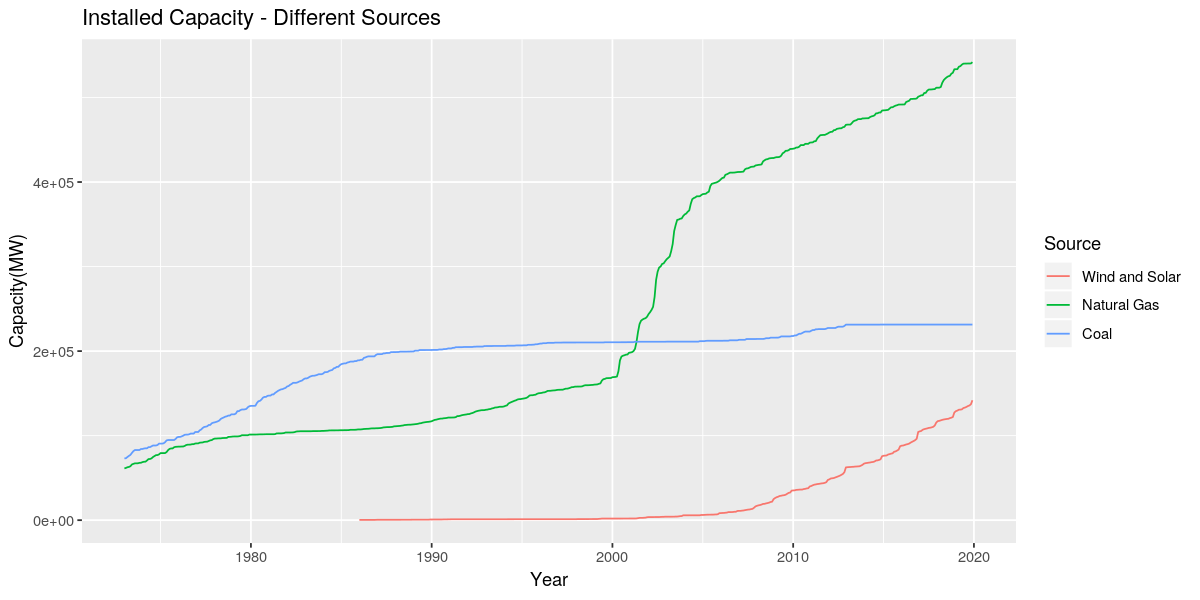

In [16]:
autoplot(cap_all) + 
    xlab("Year") + ylab("Capacity(MW)") + ggtitle("Installed Capacity - Different Sources") + 
    xlim(c(1973,2020)) + guides(color = guide_legend(title = "Source"))

Installation of new coal generation capacity tapered off in the late 1980's. There was a slight bump later between 2010-2012 but there has been <u>no</u> added capacity since. Natural gas saw a dramatic increase in capacity from 2000-2005 because of the shale boom and is still increasing. Wind and solar began their real growth at the end of the 2000's.

<br>

Another area to investigate is the relationship between generation and capacity. This should provide information on how capcity is being utilized. It is more helpful if generation data is transformed from trillions of Btu to MWh and then averaged over the month to MW. Coal is not included. The dataset does not include capacity from retired plants, resulting in utilization values $\,> 1.0$ for coal.

In [17]:
gen_ng <- monthly_dta_ts$Elec_by_Source[,"V4"]/(btu2MW*MWh2MW)
gen_rnw <- (monthly_dta_ts$Elec_by_Source[,"V12"] + monthly_dta_ts$Elec_by_Source[,"V13"])/(btu2MW*MWh2MW)

utl_ng <- gen_ng/ng_cap_ts
utl_rnw <- gen_rnw/(solar_cap_ts + wind_cap_ts)

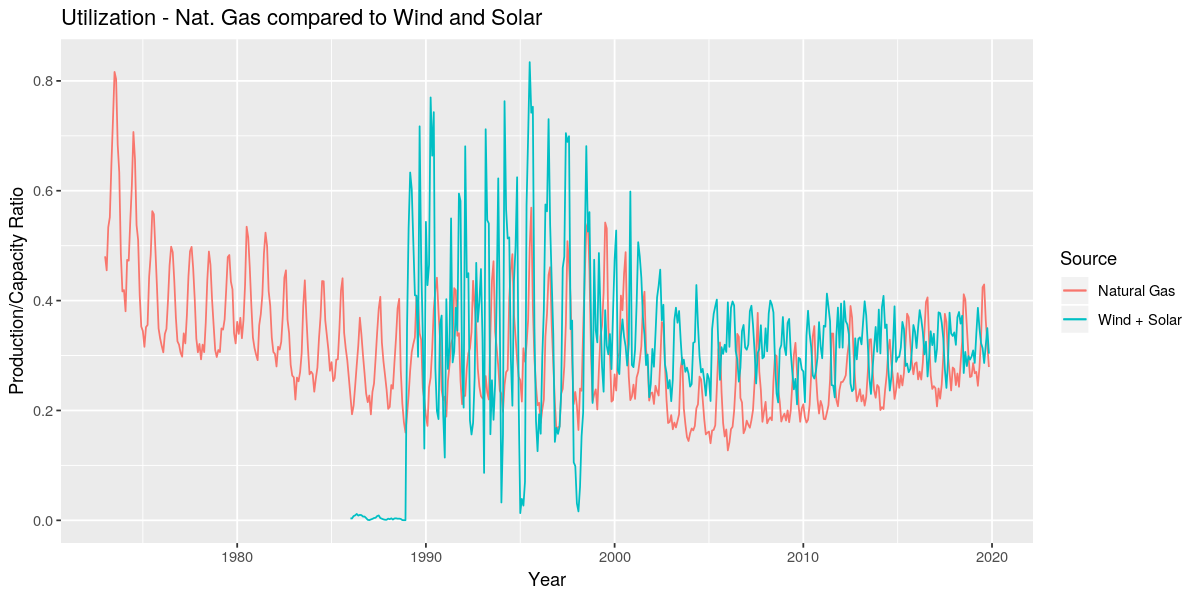

In [18]:
autoplot(utl_ng, series = "Natural Gas") + autolayer(utl_rnw, series = "Wind + Solar", na.rm = T) + 
    xlab("Year") + ylab("Production/Capacity Ratio") + ggtitle("Utilization - Nat. Gas compared to Wind and Solar") + 
    guides(color = guide_legend(title = "Source"))